In [1]:
#import libraries 
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.subplots as sp
%matplotlib inline

# Principal Component Analysis Algorithm:
The steps for computing the  PCA Algorithm are:
- Calculate the covariance matrix X of the data points.
- Compute the eigenvectors and their corresponding eigenvalues.
- Arrange the eigenvectors in descending order based on their eigenvalues.
- Select the first k eigenvectors that fulfill the desired explained variance.
- Transform the original data, which is in the shape of m observations by n features, into m observations by k selected features.

In [2]:
class PCA:
    def __init__(self, target_explained_variance=None):
        
        self.target_explained_variance = target_explained_variance
        self.feature_size = -1
# standarize the independent variable
    def standardize(self, X):
       
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        return sc.fit_transform(X)
# compute the mean of the input variables    
    def compute_mean_vector(self, X_std):
        
        return np.mean(X_std, axis=0)
    
#  Compute the coviance matrix 
    def compute_cov(self, X_std, mean_vec):
# first method to calculate the covariance matrix the covariance matrix formula              
#        m, n = X_std.shape
#        cov_matrix = np.zeros((n, n))  # Initialize a matrix to store the covariance values
#        for i in range(n):
#            for j in range(n):
#                 cov_matrix[i, j] = np.dot((X_std[:, i] - mean_vec[i]), (X_std[:, j] - mean_vec[j])) / (m - 1)
      

# Calculate the covariance matrix  using the np.cov
        centered_data = X_std - self.compute_mean_vector(X_std )
        cov_matrix = np.cov(centered_data, rowvar=False)
    
        return cov_matrix
    def compute_eigen_vector(self, cov_mat):
 
        # Calcualte eigenvalues and eigenvectors using np.linalg.eig()
        eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
        return eigenvalues, eigenvectors
    def compute_explained_variance(self, eigen_vals):
      
        
        # Sort eigenvlaues in descending order
        sort_eigen_vals = sorted(eigen_vals, reverse = True)
        # Calculate explained variance for each principal component
        return [eigen_val /  sum(eigen_vals) for eigen_val in sort_eigen_vals]
    def cumulative_sum(self, var_exp):
        
        return np.cumsum(var_exp)
    def compute_weight_matrix(self, eig_pairs, cum_var_exp):
        
        
        cum_var_exp  =np.array(cum_var_exp) 
        if self.target_explained_variance is not None:
            k = np.argmax(cum_var_exp >= self.target_explained_variance) 
            
        else:
            k = len(eig_pairs)
        weight_matrix = np.hstack([eig_pair[1].reshape(-1,1)for eig_pair in eig_pairs[:k]]) 
        return weight_matrix
   

    def transform_data(self, X_std, matrix_w):
        return X_std.dot(matrix_w)

    def fit(self, X):

        self.feature_size = X.shape[1]
        
        # your code here
        matrix_w = []
        # Standardize X
        X_std = self.standardize(X)
       # Compute mean vector and covariance matrix
        mean_vec = self.compute_mean_vector(X_std)
        cov_mat = self.compute_cov(X_std, mean_vec)
    
        # Compute eigenvectors and eigenvalues
        eigen_vals, eigen_vecs = self.compute_eigen_vector(cov_mat)
    
        # Compute explained variance and cumulative sum
        var_exp = self.compute_explained_variance(eigen_vals)
        cum_var_exp = self.cumulative_sum(var_exp)
       
        
        # Compute weight matrix
        eig_pairs = list(zip(np.abs(eigen_vals), eigen_vecs.T))
        eig_pairs.sort(key=lambda pair: pair[0], reverse=True)
        weight_matrix = self.compute_weight_matrix(eig_pairs, cum_var_exp)
      
        # Assign the relevant portion of weight_matrix to matrix_w
        matrix_w = weight_matrix  # This selects the first k principal component
        print(len(matrix_w),len(matrix_w[0]))
       # return self.transform_data(X_std=X_std, matrix_w=matrix_w)
        return self.transform_data(X_std, matrix_w)

## Step1: Covariance Matrix Computation:

In [7]:

df= pd.read_csv('fashion-mnist.csv')

# The independent variables
feature_names = df.drop('label', axis=1).columns .tolist()


# The dependent variable
X = df.drop('label', axis = 1).values
y = df.label.values
X.shape

(10000, 784)

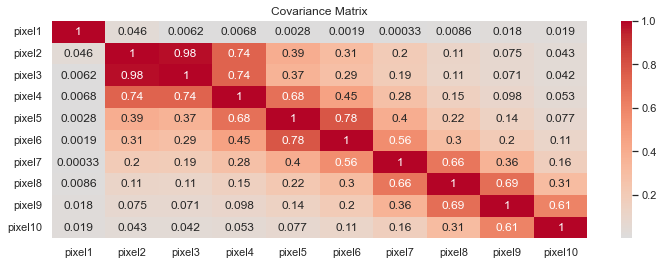

In [4]:
# Choose target_explained_variance=0.80 
pca = PCA(target_explained_variance=0.80)

# Get the X_std,  mean_vec,and cov_mat
X_std = pca.standardize(X)
mean_vec = pca.compute_mean_vector(X_std)
cov_mat = pca.compute_cov(X_std, mean_vec)

# Visualize the first ten elements of the covariance matrix
feature_names_10 = feature_names[:10]
cov_mat_10  = cov_mat[ :10, :10]

# Set up Seaborn style
sns.set(style="white")

# Create a heatmap of the covariance matrix
plt.figure(figsize=(12, 4))


# Create the heatmap
sns.heatmap(cov_mat_10, annot=True, cmap='coolwarm', center=0,
            xticklabels=feature_names_10, yticklabels=feature_names_10)

plt.title("Covariance Matrix")
plt.show()

# Step2: Compute the Eigenvalues and Eigenvectors of Covariance Matrix.

In [8]:
import chart_studio.plotly as py
import chart_studio.tools as tls
# Get the eigenvalues and eigenvectors from the PCA Algorithm:
eig_vals, eig_vecs = pca.compute_eigen_vector(cov_mat) 

# get Explained variance and cumulative variance from PCA Algorithm:
explained_variance = pca.compute_explained_variance( eig_vals)
cumulative_sum     = pca.cumulative_sum(explained_variance)
 
# visualize the eigenvalues and the cumulative 
from plotly.subplots import make_subplots
# Create subplots
fig = make_subplots(rows=2, cols=1, subplot_titles=('Eigenvalues of Covariance Matrix', 'Cumulative Sum of Eigenvalues'))

# Plot the sorted eigenvalues in the top subplot
trace1 = go.Scatter(x=np.arange(1, len(eig_vals) + 1), y=eig_vals, mode='lines+markers', name='Eigenvalues')
fig.add_trace(trace1, row=1, col=1)

# Plot the cumulative sum of the sorted eigenvalues in the bottom subplot
trace2 = go.Scatter(x=np.arange(1, len(cumulative_sum) + 1), y=cumulative_sum, mode='lines+markers', name='Cumulative Sum')
fig.add_trace(trace2, row=2, col=1)

# Update layout
fig.update_layout(title='Covariance Matrix Eigenvalues and Cumulative Sum', showlegend=True)

# Show the plot
fig.show()

### Check Orthogonality of Eigenvectors

In [12]:
# Check orthogonality
# Check the dot product between each pair of PC is null
is_orthogonal = np.allclose(np.dot(eig_vecs.T, eig_vecs), np.eye(eig_vecs.shape[1]))

if is_orthogonal:
    print("Eigenvectors are orthogonal.")
else:
    print("Eigenvectors are not orthogonal.")
is_orthogonal

Eigenvectors are orthogonal.


True

## The Sum of Squares of The Loadings:


In [15]:
# Calculate the sum of squares for each column
sum_of_squares = np.sum(eig_vecs ** 2, axis=0)
#sum_of_squares

## The Weight Matrix 

In [7]:
# Sort eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eig_vals)[::-1]  # Sort in descending order
sorted_eig_vals = eig_vals[sorted_indices]
sorted_eig_vecs = eig_vecs[:, sorted_indices]
# Create a list of tuples
eigenvalue_vector_tuples = [(eig_val, eig_vec) for eig_val, eig_vec in zip(sorted_eig_vals, sorted_eig_vecs.T)]
pca_components = pca.compute_weight_matrix(eigenvalue_vector_tuples, cumulative_sum)
# the number of principal components needed to capture 80% of explained variance
pca_components.shape

(784, 47)

In [16]:
# Create the bar plot using Plotly
explained_variance_ratios_percentage = [item * 100 for item in explained_variance]
explained_variance_ratios_percentage_10 = explained_variance_ratios_percentage[:10]

# Principal components
pc_list = [f"PC{i+1}" for i in range(len(explained_variance_ratios_percentage_10))]

# Create a DataFrame for plotting
data = pd.DataFrame({'Principal Components': pc_list, 'Explained Variance (%)': explained_variance_ratios_percentage_10})



# Choose a subset of features to display (e.g., the first 10)
num_features_to_display = 10
selected_feature_names = feature_names[:num_features_to_display]

# Principal components
columns_names = [f"PC{i+1}" for i in range(len(selected_feature_names))]

# Extract the PCA components for the selected features
pca_component = pd.DataFrame(pca_components[:num_features_to_display, :10].round(3), index=selected_feature_names, columns=columns_names)

#plot2


# Create a subplot with 1 row and 2 columns
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("PCA Heatmap", "Explained Variance"))


# Create the PCA heatmap using go.Heatmap
heatmap = go.Heatmap(
    z=pca_component.values,
    x=list(pca_component.columns),
    y=list(pca_component.index),
    colorscale='Viridis',
    showscale=True,
    colorbar=dict(title='Colorbar Title'),
)

# Add the PCA heatmap to the first column
fig.add_trace(heatmap, row=1, col=1)

# Manually add text annotations to the PCA heatmap cells
for i in range(len(pca_component.index)):
    for j in range(len(pca_component.columns)):
        text_annotation = pca_component.iloc[i, j]
        fig.add_annotation(
            x=pca_component.columns[j],
            y=pca_component.index[i],
            text=str(text_annotation),
            showarrow=False,
            font=dict(size=10),
        )

# Add the Explained Variance bar plot to the second column
fig.add_trace(go.Bar(
    x=data['Principal Components'], y=data['Explained Variance (%)'],
    text=data['Explained Variance (%)'].round(2).astype(str) + '%'
), row=1, col=2)

# Update layout for the first subplot (PCA Heatmap)
fig.update_xaxes(title_text="Principal Components", row=1, col=1)
fig.update_yaxes(title_text="Features", row=1, col=1)
fig.update_layout(title_text="PCA Component (First 10 Features)", width=1000, height=400)

# Update layout for the second subplot (Explained Variance)
fig.update_xaxes(title_text="Principal Components", row=1, col=2)
fig.update_yaxes(title_text="Explained Variance (%)", row=1, col=2)
fig.update_layout(showlegend=False)


# Show the combined subplot
fig.show()

## Step 3: Determine The Number of Principal Component.

In [11]:
# Sort eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eig_vals)[::-1]  # Sort in descending order
sorted_eig_vals = eig_vals[sorted_indices]
sorted_eig_vecs = eig_vecs[:, sorted_indices]
# Create a list of tuples
eigenvalue_vector_tuples = [(eig_val, eig_vec) for eig_val, eig_vec in zip(sorted_eig_vals, sorted_eig_vecs.T)]
pca_components = pca.compute_weight_matrix(eigenvalue_vector_tuples, cumulative_sum)
# the number of principal components needed to capture 80% of explained variance
pca_components.shape

(784, 47)

## Step 4: Transform The Original Data

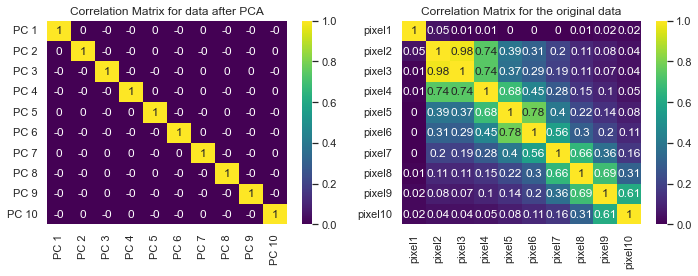

In [17]:
X_pca = pca.transform_data( X_std, pca_components[ : , :10])

df_pc   = pd.DataFrame(X_pca, columns=[f'PC {i+1}' for i in range(10)])

df1  = pd.DataFrame(X, columns=feature_names)

# Calculate the correlation matrix
corr_matrix = df_pc.corr()
corr_matrix1 = df1.corr()

# Create subplots for the two correlation matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first correlation matrix
sns.heatmap(round(corr_matrix.iloc[:10, :10],2), cmap='viridis', annot=True, ax=axes[0])
axes[0].set_title('Correlation Matrix for data after PCA')

# Plot the second correlation matrix
sns.heatmap(# Calculate the correlation matrix
round(corr_matrix1.iloc[:10, :10],2), cmap='viridis', annot=True, ax=axes[1])
axes[1].set_title('Correlation Matrix for the original data')

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

In [ ]:
##

In [26]:
# Check the independence of the PC"
from sklearn.decomposition import  FastICA
# Step 1: Perform PCA to obtain principal components

X_pca = pca.transform_data( X_std, pca_components)

# Step 2: Apply ICA to the PCA-transformed data to extract independent components

ica = FastICA()
ica_result = ica.fit_transform(X_pca)
ica_result.shape 

(10000, 47)

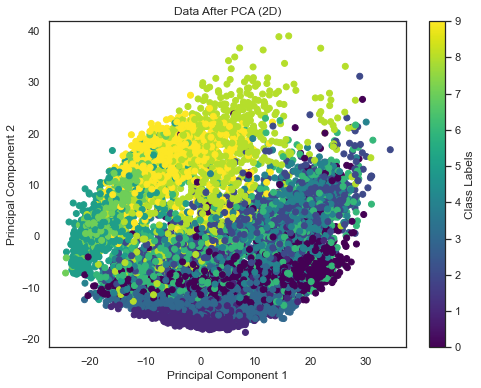

In [30]:
# Create a scatter plot of the data after PCA
plt.figure(figsize=(8, 6))
sc =plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data After PCA (2D)')
# Add color bar for the labels
cbar = plt.colorbar(sc)
cbar.set_label('Class Labels')
plt.show()